# Acquire

Let's acquire the parking citations data from our file.
1. Import libraries.
1. Load the dataset.
1. Display the shape and first/last 2 rows.
1. Display general infomation about the dataset - w/ the # of unique values in each column.
1. Display the number of missing values in each column.
1. Descriptive statistics for all numeric features.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import time
import folium

# Insert path to the source folder.
sys.path.insert(1, 'src/')
import acquire
import prepare

# Filter warnings
from warnings import filterwarnings
filterwarnings('ignore')

## Street Sweeper Citations
Data: [Los Angeles Parking Citations](https://www.kaggle.com/cityofLA/los-angeles-parking-citations)<br>
Load the dataset and filter for:
- Citations issued from 2017-01-01 to 2020-12-22.
- Street Sweeping violations Violation Description"

In [2]:
df = acquire.get_sweep_data()

In [3]:
df = prepare.prep_sweep_data(df)

In [4]:
df.head(2)

,issue_date,issue_time,rp_state_plate,plate_expiry_date,make,body_style,color,location,route,agency,violation_code,violation_description,fine_amount,latitude,longitude,day_of_week,issue_year,issue_hour,issue_minute
0,2017-01-03,10:53:00,CA,2017-07-01,VOLK,PA,MR,2400 PATRICIA AVENUE,00108,51,80.69BS,NO PARK/STREET CLEAN,73.0,34.0452,-118.4190,Tuesday,2017,10,53
1,2017-01-03,11:03:00,CA,2016-07-01,TOYT,PA,BK,121 76TH PL E,00553,55,80.69BS,NO PARK/STREET CLEAN,73.0,33.9705,-118.2735,Tuesday,2017,11,3


In [5]:
df.tail(2)

,issue_date,issue_time,rp_state_plate,plate_expiry_date,make,body_style,color,location,route,agency,violation_code,violation_description,fine_amount,latitude,longitude,day_of_week,issue_year,issue_hour,issue_minute
1634567,2020-12-22,12:38:00,CA,2022-01-01,CHEV,PA,GY,6211 EILEEN AVE,00500,55,80.69BS,NO PARK/STREET CLEAN,73.0,33.9834,-118.3428,Tuesday,2020,12,38
1634568,2020-12-22,10:46:00,CA,2020-10-01,SUBA,PA,GY,21515 GAULT ST,00300,53,80.69BS,NO PARK/STREET CLEAN,73.0,34.1992,-118.5992,Tuesday,2020,10,46


In [6]:
df.describe()

,agency,fine_amount,latitude,longitude,issue_year,issue_hour,issue_minute
count,1.634569e+06,1.634569e+06,1.634569e+06,1.634569e+06,1.634569e+06,1.634569e+06,1.634569e+06
mean,5.338259e+01,7.299998e+01,3.351670e+01,-1.200096e+02,2.018170e+03,9.888676e+00,2.591586e+01
std,1.978003e+00,1.659222e-02,1.823776e+00,5.437628e+00,1.047889e+00,1.849224e+00,1.503395e+01
min,1.000000e+00,5.300000e+01,2.751750e+01,-1.379131e+02,2.017000e+03,1.000000e+00,0.000000e+00
25%,5.100000e+01,7.300000e+01,3.400550e+01,-1.184517e+02,2.017000e+03,8.000000e+00,1.300000e+01
50%,5.400000e+01,7.300000e+01,3.405700e+01,-1.183591e+02,2.018000e+03,1.000000e+01,2.400000e+01
75%,5.500000e+01,7.300000e+01,3.410030e+01,-1.182929e+02,2.019000e+03,1.200000e+01,3.700000e+01
max,5.800000e+01,7.300000e+01,3.432320e+01,-1.181606e+02,2.020000e+03,2.300000e+01,5.900000e+01


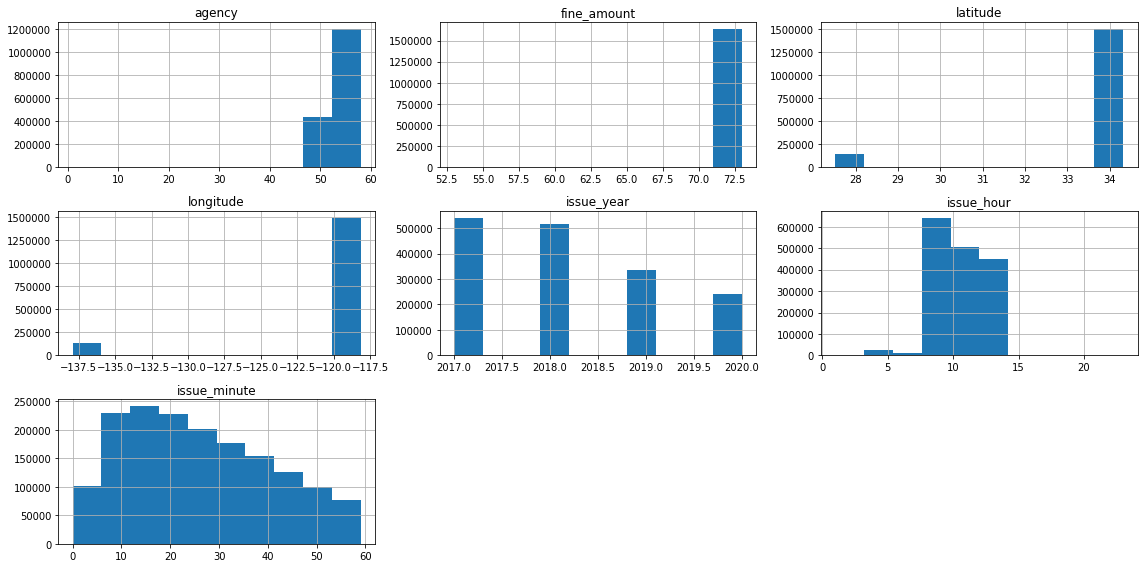

In [7]:
df.hist(figsize=(16, 8))
plt.tight_layout();

__Initial findings__
- `Issue time` and `Marked Time` are quasi-normally distributed. Note: Poisson Distribution
- It's interesting to see the distribution of our activity on earth follows a normal distribution.
- Agencies 50+ write the most parking citations.
- Most fine amounts are less than $100.00
- There are a few license plates that are null or invalid entrys.

## News Articles, Social Media, and Youtube

### News Articles
- https://www.latimes.com/california/story/2020-03-16/los-angeles-parking-ticket-street-sweeping-coronavirus-covid19
- https://www.latimes.com/california/story/2020-10-15/street-sweeping-parking-enforcement-resumes-today
- https://abc7.com/society/las-resumed-parking-enforcement-prompts-outcry/7079278/
- https://labss.maps.arcgis.com/apps/webappviewer/index.html?id=51d5f486a30a4c9f9397f31cdaa3ae17
- https://streetsla.lacity.org/

### Social Media

### Youtube

In [8]:
df_yt = acquire.get_yt_data()

In [9]:
df_yt.head()

0    is covid over so why in the world would they d...
1                        easy to pick on little people
2    cool maybe now they can cite my neighbor who h...
3    thats how the county gets ya money professiona...
4    they was still giving tickets during cv im wat...
Name: comments, dtype: object

# Prepare

- Remove spaces + capitalization in each column name
- Cast `Plate Expiry Date` to datetime data type.
- Cast `Issue Date` and `Issue Time` to datetime data types.
- Drop columns missing >=74.42\% of their values. 
- Drop missing values.

# Exploratory Data Analysis

```python
m = folium.Map(location=[34.0522, -118.2437],
               min_zoom=8,
               max_bounds=True)

mc = plugins.MarkerCluster()

for index, row in df.iterrows():
    mc.add_child(
        
        folium.Marker(location=[str(row['latitude']), str(row['longitude'])],
                      popup='Cited {} {} at {}'.format(row['day_of_week'],
                                                       row['issue_date'].strftime('%Y-%m-%d'),
                                                       row['issue_time'][:-3]),
                      control_scale=True,
                      clustered_marker=True
                     )
    )
    

m.add_child(mc)

m.save('citations_2020.html')
```

### Sentiment Analysis
- Youtube
- Twitter

### Hypothesis Test 1

**Initial Query**
Was the amount of citations issued in October 2020 significantly greater than previous Octobers?

**Statistical Test**

$H_0$: There is no significant difference...

$H_a$: There is a significant difference...

### Hypothesis Test 2

**Initial Query**
Question

**Statistical Test**

$H_0$:

$H_a$:

### Hypothesis Test 3

**Initial Query**
Question

**Statistical Test**

$H_0$:

$H_a$:

# Conclusions